In [341]:
import torch

In [342]:
x = torch.tensor(2.0, requires_grad=True)

In [343]:
# Function to generate derivatives of
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

In [344]:
print(y) # value of function y at the point 2.0 [tensor x]

tensor(63., grad_fn=<AddBackward0>)


In [345]:
type(y)

torch.Tensor

In [346]:
y.backward() # performs back propagation

In [347]:
x.grad # value of y's first derivative at the point x [2.0]

tensor(93.)

In [348]:
x = torch.tensor([[1.,2.,3.],[3.,2.,1.]],requires_grad=True)

In [349]:
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


In [350]:
y = 3*x + 2

In [351]:
print(y) # result of y at the point x

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


In [352]:
z = 2*y**2

In [353]:
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [354]:
out = z.mean()

In [355]:
print(out)

tensor(140., grad_fn=<MeanBackward0>)


In [356]:
# Back propagation w.r.t. all theese functions
out.backward()
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


## Linear regression with PyTorch

In [357]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [358]:
import torch.nn as nn

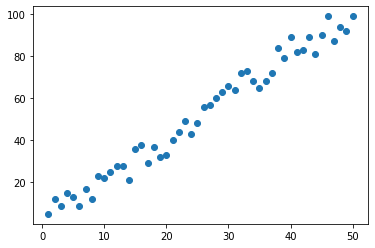

In [359]:
X = torch.linspace(1,50,50).reshape(-1,1)
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float) # noise
y = 2*X + 1 + e
plt.scatter(X,y)

In [360]:
torch.manual_seed(59)
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


### Building a model

In [361]:
# Set up model class
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [362]:
torch.manual_seed(59)

model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [363]:
for name, param in model.named_parameters():
    print(name,'\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [364]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [365]:
x1 = np.linspace(0.0,50.0,50)

In [366]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

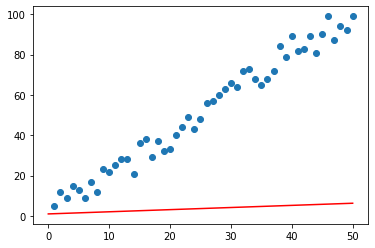

In [367]:
plt.scatter(X,y)
plt.plot(x1,y1,'r')

In [368]:
criterion = nn.MSELoss()

In [369]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [370]:
epoch = 50
losses = []

for i in range(epoch):
    i += 1
    # Prediction on the forward pass
    y_pred = model.forward(X)
    # calculate our loss (error)
    loss = criterion(y_pred,y)
    # record that error
    losses.append(loss)
    print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")
    # preventing from accumulating error in derivatives
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 1 loss: 3057.216796875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 2 loss: 1588.53076171875 weight: 3.334900140762329 bias: 1.0604636669158936
epoch 3 loss: 830.2999267578125 weight: 1.014832854270935 bias: 0.9922628402709961
epoch 4 loss: 438.8521423339844 weight: 2.6817994117736816 bias: 1.0425218343734741
epoch 5 loss: 236.76144409179688 weight: 1.4840213060379028 bias: 1.0076650381088257
epoch 6 loss: 132.4291229248047 weight: 2.3446059226989746 bias: 1.0339646339416504
epoch 7 loss: 78.56573486328125 weight: 1.7262253761291504 bias: 1.0163217782974243
epoch 8 loss: 50.75775909423828 weight: 2.170504093170166 bias: 1.0302516222000122
epoch 9 loss: 36.4012336730957 weight: 1.8512457609176636 bias: 1.0214954614639282
epoch 10 loss: 28.98923110961914 weight: 2.0806007385253906 bias: 1.029038906097412
epoch 11 loss: 25.16238784790039 weight: 1.9157683849334717 bias: 1.0248701572418213
epoch 12 loss: 23.186473846435547 weight: 2.034165620803833 bias: 1.0291162729263

Text(0.5, 0, 'EPOCH')

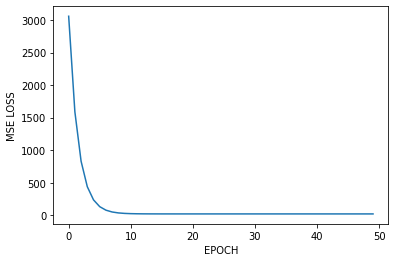

In [371]:
plt.plot(range(epoch), losses)
plt.ylabel('MSE LOSS')
plt.xlabel('EPOCH')

In [372]:
x = np.linspace(0.0,50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*x + current_bias

In [373]:
predicted_y

array([  1.05575156,   3.08005679,   5.10436203,   7.12866726,
         9.15297249,  11.17727772,  13.20158295,  15.22588818,
        17.25019342,  19.27449865,  21.29880388,  23.32310911,
        25.34741434,  27.37171957,  29.39602481,  31.42033004,
        33.44463527,  35.4689405 ,  37.49324573,  39.51755096,
        41.5418562 ,  43.56616143,  45.59046666,  47.61477189,
        49.63907712,  51.66338236,  53.68768759,  55.71199282,
        57.73629805,  59.76060328,  61.78490851,  63.80921375,
        65.83351898,  67.85782421,  69.88212944,  71.90643467,
        73.9307399 ,  75.95504514,  77.97935037,  80.0036556 ,
        82.02796083,  84.05226606,  86.07657129,  88.10087653,
        90.12518176,  92.14948699,  94.17379222,  96.19809745,
        98.22240268, 100.24670792])

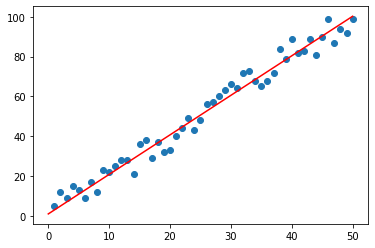

In [374]:
plt.scatter(X, y)
plt.plot(x,predicted_y,'r')